<p><font size="6"><b>09 - Pandas: Combining datasets</b></font></p>


> *© 2024, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
import pandas as pd

Combining data is essential functionality in a data analysis workflow. 

Data is distributed in multiple files, different information needs to be merged, new data is calculated, .. and needs to be added together. Pandas provides various facilities for easily combining together Series and DataFrame objects

In [2]:
# redefining the example objects

# series
population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 
                        'United Kingdom': 64.9, 'Netherlands': 16.9})

# dataframe
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


# Adding columns

As we already have seen before, adding a single column is very easy:

In [3]:
pop_density = countries['population']*1e6 / countries['area']

In [4]:
pop_density

0    370.370370
1     95.783158
2    227.699202
3    406.973944
4    265.092721
dtype: float64

In [5]:
countries['pop_density'] = pop_density

In [6]:
countries

,country,population,area,capital,pop_density
0,Belgium,11.3,30510,Brussels,370.370370
1,France,64.3,671308,Paris,95.783158
2,Germany,81.3,357050,Berlin,227.699202
3,Netherlands,16.9,41526,Amsterdam,406.973944
4,United Kingdom,64.9,244820,London,265.092721


Adding multiple columns at once is also possible. For example, the following method gives us a DataFrame of two columns:

In [7]:
countries["country"].str.split(" ", expand=True)

,0,1
0,Belgium,None
1,France,None
2,Germany,None
3,Netherlands,None
4,United,Kingdom


We can add both at once to the dataframe:

In [8]:
countries[['first', 'last']] = countries["country"].str.split(" ", expand=True)

In [9]:
countries

,country,population,area,capital,pop_density,first,last
0,Belgium,11.3,30510,Brussels,370.370370,Belgium,None
1,France,64.3,671308,Paris,95.783158,France,None
2,Germany,81.3,357050,Berlin,227.699202,Germany,None
3,Netherlands,16.9,41526,Amsterdam,406.973944,Netherlands,None
4,United Kingdom,64.9,244820,London,265.092721,United,Kingdom


# Concatenating data

The ``pd.concat`` function does all of the heavy lifting of combining data in different ways.

``pd.concat`` takes a list or dict of Series/DataFrame objects and concatenates them in a certain direction (`axis`) with some configurable handling of “what to do with the other axes”.

## Combining rows - ``pd.concat``

![](../img/pandas/schema-concat0.svg)

Assume we have some similar data as in `countries`, but for a set of different countries:

In [10]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


In [11]:
data = {'country': ['Nigeria', 'Rwanda', 'Egypt', 'Morocco', ],
        'population': [182.2, 11.3, 94.3, 34.4],
        'area': [923768, 26338 , 1010408, 710850],
        'capital': ['Abuja', 'Kigali', 'Cairo', 'Rabat']}
countries_africa = pd.DataFrame(data)
countries_africa 

,country,population,area,capital
0,Nigeria,182.2,923768,Abuja
1,Rwanda,11.3,26338,Kigali
2,Egypt,94.3,1010408,Cairo
3,Morocco,34.4,710850,Rabat


We now want to combine the rows of both datasets:

In [12]:
pd.concat([countries, countries_africa])

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London
0,Nigeria,182.2,923768,Abuja
1,Rwanda,11.3,26338,Kigali
2,Egypt,94.3,1010408,Cairo
3,Morocco,34.4,710850,Rabat


If we don't want the index to be preserved:

In [13]:
pd.concat([countries, countries_africa], ignore_index=True)

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London
5,Nigeria,182.2,923768,Abuja
6,Rwanda,11.3,26338,Kigali
7,Egypt,94.3,1010408,Cairo
8,Morocco,34.4,710850,Rabat


When the two dataframes don't have the same set of columns, by default missing values get introduced:

In [14]:
pd.concat([countries, countries_africa[['country', 'capital']]], ignore_index=True)

,country,population,area,capital
0,Belgium,11.3,30510.0,Brussels
1,France,64.3,671308.0,Paris
2,Germany,81.3,357050.0,Berlin
3,Netherlands,16.9,41526.0,Amsterdam
4,United Kingdom,64.9,244820.0,London
5,Nigeria,NaN,NaN,Abuja
6,Rwanda,NaN,NaN,Kigali
7,Egypt,NaN,NaN,Cairo
8,Morocco,NaN,NaN,Rabat


We can also pass a dictionary of objects instead of a list of objects. Now the keys of the dictionary are preserved as an additional index level:

In [15]:
pd.concat({'europe': countries, 'africa': countries_africa})

country  population     area    capital
europe 0         Belgium        11.3    30510   Brussels
       1          France        64.3   671308      Paris
       2         Germany        81.3   357050     Berlin
       3     Netherlands        16.9    41526  Amsterdam
       4  United Kingdom        64.9   244820     London
africa 0         Nigeria       182.2   923768      Abuja
       1          Rwanda        11.3    26338     Kigali
       2           Egypt        94.3  1010408      Cairo
       3         Morocco        34.4   710850      Rabat

<div class="alert alert-info">

**NOTE**:

A typical use case of `concat` is when you create (or read) multiple DataFrame with a similar structure in a loop, and then want to combine this list of DataFrames into a single DataFrame.

For example, assume you have a folder of similar CSV files (eg the data per day) you want to read and combine, this would look like:

```python
import pathlib

data_files = pathlib.Path("data_directory").glob("*.csv")

dfs = []

for path in data_files:
    temp = pd.read_csv(path)
    dfs.append(temp)

df = pd.concat(dfs)
```
<br>
Important: append to a list (not DataFrame), and concat this list at the end after the loop!

</div>

# Joining data with `pd.merge`

Using `pd.concat` above, we combined datasets that had the same columns. But, another typical case is where you want to add information of a second dataframe to a first one based on one of the columns they have in common. That can be done with [`pd.merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html).

Let's look again at the titanic passenger data, but taking a small subset of it to make the example easier to grasp:

In [16]:
df = pd.read_csv("data/titanic.csv")
df = df.loc[:9, ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]

In [17]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
5,0,3,male,NaN,8.4583,Q
6,0,1,male,54.0,51.8625,S
7,0,3,male,2.0,21.0750,S
8,1,3,female,27.0,11.1333,S
9,1,2,female,14.0,30.0708,C


Assume we have another dataframe with more information about the 'Embarked' locations:

In [18]:
locations = pd.DataFrame({'Embarked': ['S', 'C', 'N'],
                          'City': ['Southampton', 'Cherbourg', 'New York City'],
                          'Country': ['United Kindom', 'France', 'United States']})

In [19]:
locations

,Embarked,City,Country
0,S,Southampton,United Kindom
1,C,Cherbourg,France
2,N,New York City,United States


We now want to add those columns to the titanic dataframe, for which we can use `pd.merge`, specifying the column on which we want to merge the two datasets:

In [20]:
pd.merge(df, locations, on='Embarked', how='left')

,Survived,Pclass,Sex,Age,Fare,Embarked,City,Country
0,0,3,male,22.0,7.2500,S,Southampton,United Kindom
1,1,1,female,38.0,71.2833,C,Cherbourg,France
2,1,3,female,26.0,7.9250,S,Southampton,United Kindom
3,1,1,female,35.0,53.1000,S,Southampton,United Kindom
4,0,3,male,35.0,8.0500,S,Southampton,United Kindom
5,0,3,male,NaN,8.4583,Q,NaN,NaN
6,0,1,male,54.0,51.8625,S,Southampton,United Kindom
7,0,3,male,2.0,21.0750,S,Southampton,United Kindom
8,1,3,female,27.0,11.1333,S,Southampton,United Kindom
9,1,2,female,14.0,30.0708,C,Cherbourg,France


In this case we use `how='left` (a "left join") because we wanted to keep the original rows of `df` and only add matching values from `locations` to it. Other options are 'inner', 'outer' and 'right' (see the [docs](http://pandas.pydata.org/pandas-docs/stable/merging.html#brief-primer-on-merge-methods-relational-algebra) for more on this, or this visualization: https://joins.spathon.com/).

## Exercise with VAT numbers

For this exercise, we start from an open dataset on *"Enterprises subject to VAT"* (VAT = Value Added Tax), from https://statbel.fgov.be/en/open-data/enterprises-subject-vat-according-legal-form-11. For different regions and different enterprise types, it contains the number of enterprises subset to VAT ("MS_NUM_VAT"), and the number of such enterprises that started ("MS_NUM_VAT_START") or stopped ("MS_NUM_VAT_STOP") in 2019.

This file is provided as a zipped archive of a SQLite database file. Let's first unzip it:

In [21]:
import zipfile

with zipfile.ZipFile("data/TF_VAT_NACE_SQ_2019.zip", "r") as zip_ref:
    zip_ref.extractall()

SQLite (https://www.sqlite.org/index.html) is a light-weight database engine, and a database can be stored as a single file. With the `sqlite3` module of the Python standard library, we can open such a database and inspect it:

In [22]:
import sqlite3

# connect with the database file
con = sqlite3.connect("TF_VAT_NACE_2019.sqlite")
# list the tables that are present in the database
con.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

[('TF_VAT_NACE_2019',),
 ('TD_NACE',),
 ('TD_LGL_PSN_VAT',),
 ('TD_MUNTY_REFNIS',)]

Pandas provides functionality to query data from a database. Let's fetch the main dataset contained in this file:

In [23]:
df = pd.read_sql("SELECT * FROM TF_VAT_NACE_2019", con)
df

,CD_REFNIS,CD_LGL_PSN_VAT,CD_NACE,MS_NUM_VAT,MS_NUM_VAT_START,MS_NUM_VAT_STOP
0,-----,0,01110,14.0,1.0,0.0
1,-----,0,01130,10.0,0.0,0.0
2,-----,0,01240,1.0,0.0,0.0
3,-----,0,01410,5.0,0.0,0.0
4,-----,0,01420,3.0,0.0,1.0
...,...,...,...,...,...,...
304240,XXXXX,0,71111,1.0,0.0,0.0
304241,XXXXX,0,86909,1.0,1.0,0.0
304242,XXXXX,0,93110,1.0,0.0,0.0
304243,XXXXX,0,96021,1.0,0.0,0.0


More information about the identifyer variables (the first three columns) can be found in the other tables. For example, the "CD_LGL_PSN_VAT" column contains information about the legal form of the enterprise. What the values in this column mean, can be found in a different table:

In [24]:
df_legal_forms = pd.read_sql("SELECT * FROM TD_LGL_PSN_VAT", con)
df_legal_forms

,CD_LGL_PSN_VAT,TX_LGL_PSN_VAT_FR_LVL1,TX_LGL_PSN_VAT_NL_LVL1,TX_LGL_PSN_VAT_EN_LVL1
0,7,ASBL (association sans but lucratif),VZW (vereniging zonder winstgevend doel),Non-profit organization
1,5,Association commerciale en participation ou as...,Handelsvereniging in deelneming of tijdelijke ...,Company incorporated under foreign law
2,9,"Autre société, groupement ou association",Andere rechtsvormen,"Other company, grouping or association"
3,8,Organisme de droit public,Publiekrechterlijke instelling,Body governed by public law
4,0,Personne physique,Natuurlijke persoon,Individuals
5,2,SA (société anonyme) ou SCA (société en comman...,NV (naamloze vennootschap) of VGD (vennootscha...,Public limited company or partnership limited ...
6,1,SNC (société en nom collectif) ou SCS (société...,VGN (vennootschap onder gemeenschappelijke naa...,Partnership or limited partnership
7,3,SPRL (société privée à responsabilité limitée),BVBA,Private limited liability company
8,6,Société commerciale de droit étranger,Handelsvennootschap van buitenlands recht,Commercial cooperative association or tempora...
9,4,Société coopérative,Coöperative vennootschap,Cooperative company


This type of data organization is called a **"star schema"** (https://en.wikipedia.org/wiki/Star_schema), and if we want to get the a "denormalized" version of the main dataset (all the data combined), we need to join the different tables.

<div class="alert alert-success">

**EXERCISE**:

Add the full name of the legal form (in the DataFrame `df_legal_forms`) to the main dataset (`df`). For this, join both datasets based on the "CD_LGL_PSN_VAT" column.
    
<details><summary>Hints</summary>

- `pd.merge` requires a left and a right DataFrame, the specification `on` to define the common index and the merge type `how`. 
- Decide which type of merge is most appropriate: left, right, inner,...

</details>      

</div>

In [25]:
joined = pd.merge(df, df_legal_forms, on="CD_LGL_PSN_VAT", how="left")
joined

,CD_REFNIS,CD_LGL_PSN_VAT,CD_NACE,MS_NUM_VAT,MS_NUM_VAT_START,MS_NUM_VAT_STOP,TX_LGL_PSN_VAT_FR_LVL1,TX_LGL_PSN_VAT_NL_LVL1,TX_LGL_PSN_VAT_EN_LVL1
0,-----,0,01110,14.0,1.0,0.0,Personne physique,Natuurlijke persoon,Individuals
1,-----,0,01130,10.0,0.0,0.0,Personne physique,Natuurlijke persoon,Individuals
2,-----,0,01240,1.0,0.0,0.0,Personne physique,Natuurlijke persoon,Individuals
3,-----,0,01410,5.0,0.0,0.0,Personne physique,Natuurlijke persoon,Individuals
4,-----,0,01420,3.0,0.0,1.0,Personne physique,Natuurlijke persoon,Individuals
...,...,...,...,...,...,...,...,...,...
304240,XXXXX,0,71111,1.0,0.0,0.0,Personne physique,Natuurlijke persoon,Individuals
304241,XXXXX,0,86909,1.0,1.0,0.0,Personne physique,Natuurlijke persoon,Individuals
304242,XXXXX,0,93110,1.0,0.0,0.0,Personne physique,Natuurlijke persoon,Individuals
304243,XXXXX,0,96021,1.0,0.0,0.0,Personne physique,Natuurlijke persoon,Individuals


<div class="alert alert-success">

**EXERCISE**:

How many registered enterprises are there for each legal form? Sort the result from most to least occurring form.

<details><summary>Hints</summary>

- To count the number of registered enterprises, take the `sum` _for each_ (`groupby`) legal form.
- Check the `ascending` parameter of the `sort_values` function.

</details>    
    
</div>

In [26]:
joined.groupby("TX_LGL_PSN_VAT_EN_LVL1")["MS_NUM_VAT"].sum().sort_values(ascending=False)

TX_LGL_PSN_VAT_EN_LVL1
Individuals                                                                462855.0
Private limited liability company                                          353482.0
Public limited company or partnership limited by shares                     66522.0
Partnership or limited partnership                                          51152.0
Non-profit organization                                                     25589.0
Commercial cooperative association  or temporary commercial association     16045.0
Cooperative company                                                         12785.0
Company incorporated under foreign law                                      10606.0
Other company, grouping or association                                      10379.0
Body governed by public law                                                  1220.0
Name: MS_NUM_VAT, dtype: float64

<div class="alert alert-success">

**EXERCISE**:

How many enterprises are registered per province?

* Read in the "TD_MUNTY_REFNIS" table from the database file into a `df_muni` dataframe, which contains more information about the municipality (and the province in which the municipality is located).
* Merge the information about the province into the main `df` dataset.
* Using the joined dataframe, calculate the total number of registered companies per province.

<details><summary>Hints</summary>

- Data loading in Pandas requires `pd.read_...`, in this case `read_sql`. Do not forget the connection object as a second input.
- `df_muni` contains a lot of columns, whereas we are only interested in the province information. Only use the relevant columns "TX_PROV_DESCR_EN" and "CD_REFNIS" (you need this to join the data).
- Calculate the `sum` _for each_ (`groupby`) province.    
    

</details>    
    
</div>

In [27]:
df_muni = pd.read_sql("SELECT * FROM TD_MUNTY_REFNIS", con)
df_muni

,CD_LVL_BASE,CD_ADM_DSTR_REFNIS,TX_ADM_DSTR_DESCR_NL,TX_ADM_DSTR_DESCR_FR,TX_ADM_DSTR_DESCR_EN,CD_PROV_REFNIS,TX_PROV_DESCR_NL,TX_PROV_DESCR_FR,TX_PROV_DESCR_EN,CD_RGN_REFNIS,TX_RGN_DESCR_NL,TX_RGN_DESCR_FR,TX_RGN_DESCR_EN,CD_REFNIS,TX_MUNTY_DESCR_NL,TX_MUNTY_DESCR_FR,TX_MUNTY_DESCR_EN
0,0.0,-----,Buitenland,Etranger,Foreigner,-----,Buitenland,Etranger,Foreigner,-----,Buitenland,Etranger,Foreigner,-----,Buitenland,Etranger,Foreigner
1,0.0,XXXXX,Onbekend,Non attribué,Unknown,XXXXX,Onbekend,Non attribué,Unknown,XXXXX,Onbekend,Non attribué,Unknown,XXXXX,Onbekend,Non attribué,Unknown
2,1.0,,,,,,,,,02000,Vlaams Gewest,Région flamande,Flanders region,,,,
3,1.0,,,,,,,,,03000,Waals Gewest,Région wallonne,Walloon region,,,,
4,1.0,,,,,,,,,04000,Brussels Hoofdstedelijk Gewest,Région de Bruxelles-Capitale,Brussels-Capital region,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,4.0,93000,Arrondissement Philippeville,Arrondissement de Philippeville,District of Philippeville,90000,Provincie Namen,Province de Namur,Province of Namur,03000,Waals Gewest,Région wallonne,Walloon region,93018,Doische,Doische,Doische
635,4.0,93000,Arrondissement Philippeville,Arrondissement de Philippeville,District of Philippeville,90000,Provincie Namen,Province de Namur,Province of Namur,03000,Waals Gewest,Région wallonne,Walloon region,93022,Florennes,Florennes,Florennes
636,4.0,93000,Arrondissement Philippeville,Arrondissement de Philippeville,District of Philippeville,90000,Provincie Namen,Province de Namur,Province of Namur,03000,Waals Gewest,Région wallonne,Walloon region,93056,Philippeville,Philippeville,Philippeville
637,4.0,93000,Arrondissement Philippeville,Arrondissement de Philippeville,District of Philippeville,90000,Provincie Namen,Province de Namur,Province of Namur,03000,Waals Gewest,Région wallonne,Walloon region,93088,Walcourt,Walcourt,Walcourt


In [28]:
joined = pd.merge(df, df_muni[["CD_REFNIS", "TX_PROV_DESCR_EN"]], on="CD_REFNIS", how="left")
joined

,CD_REFNIS,CD_LGL_PSN_VAT,CD_NACE,MS_NUM_VAT,MS_NUM_VAT_START,MS_NUM_VAT_STOP,TX_PROV_DESCR_EN
0,-----,0,01110,14.0,1.0,0.0,Foreigner
1,-----,0,01130,10.0,0.0,0.0,Foreigner
2,-----,0,01240,1.0,0.0,0.0,Foreigner
3,-----,0,01410,5.0,0.0,0.0,Foreigner
4,-----,0,01420,3.0,0.0,1.0,Foreigner
...,...,...,...,...,...,...,...
304240,XXXXX,0,71111,1.0,0.0,0.0,Unknown
304241,XXXXX,0,86909,1.0,1.0,0.0,Unknown
304242,XXXXX,0,93110,1.0,0.0,0.0,Unknown
304243,XXXXX,0,96021,1.0,0.0,0.0,Unknown


In [29]:
joined.groupby("TX_PROV_DESCR_EN")["MS_NUM_VAT"].sum()

TX_PROV_DESCR_EN
                               110825.0
Foreigner                       21351.0
Province of Antwerpen          169944.0
Province of Brabant Wallon      44134.0
Province of Hainaut             78988.0
Province of Limburg             77648.0
Province of Liège               77555.0
Province of Luxembourg          20484.0
Province of Namur               39581.0
Province of Oost-Vlaanderen    140752.0
Province of Vlaams-Brabant     102511.0
Province of West-Vlaanderen    126830.0
Unknown                            32.0
Name: MS_NUM_VAT, dtype: float64

## Joining with spatial data to make a map

The course materials contains a simplified version of the "statistical sectors" dataset (https://statbel.fgov.be/nl/open-data/statistische-sectoren-2019), with the borders of the municipalities. This dataset is provided as a zipped ESRI Shapefile, one of the often used file formats used in GIS for vector data.

The [GeoPandas](https://geopandas.org) package extends pandas with geospatial functionality.

In [30]:
import geopandas

In [31]:
stat = geopandas.read_file("data/statbel_statistical_sectors_2019.shp.zip")

In [32]:
stat.head()

,CNIS5_2019,T_MUN_NL,geometry
0,11001,Aartselaar,"POLYGON ((149749.810 200010.590, 149357.258 19..."
1,11002,Antwerpen,"POLYGON ((150404.609 203944.208, 148966.892 20..."
2,11004,Boechout,"POLYGON ((159409.801 203788.565, 157776.765 20..."
3,11005,Boom,"POLYGON ((149741.614 196997.251, 149404.790 19..."
4,11007,Borsbeek,"POLYGON ((159324.024 208776.284, 159805.357 20..."


<AxesSubplot:>

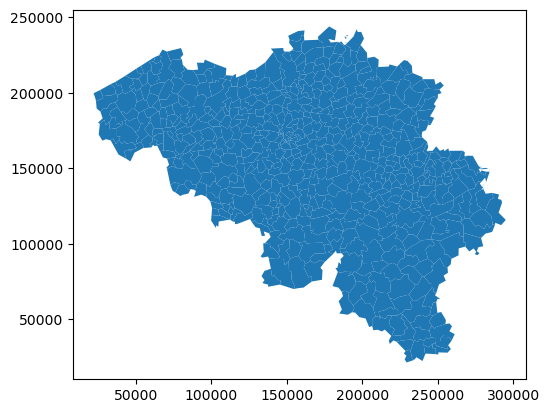

In [33]:
stat.plot()

The resulting dataframe (a `GeoDataFrame`) has a "geometry" column (in this case with polygons representing the borders of the municipalities), and a couple of new methods with geospatial functionality (for example, the `plot()` method by default makes a map). It is still a DataFrame, and everything we have learned about pandas can be used here as well.

Let's visualize the change in number of registered enterprises on a map at the municipality-level. 

We first calculate the total number of (existing/starting/stopping) enterprises per municipality:

In [34]:
df_by_muni = df.groupby("CD_REFNIS")[['MS_NUM_VAT', 'MS_NUM_VAT_START', 'MS_NUM_VAT_STOP']].sum()

And add a new column with the relative change in the number of registered enterprises:

In [35]:
df_by_muni["NUM_VAT_CHANGE"] = (df_by_muni["MS_NUM_VAT_START"] - df_by_muni["MS_NUM_VAT_STOP"]) / df_by_muni["MS_NUM_VAT"] * 100

In [36]:
df_by_muni

,MS_NUM_VAT,MS_NUM_VAT_START,MS_NUM_VAT_STOP,NUM_VAT_CHANGE
CD_REFNIS,,,,
-----,21351.0,2937.0,1354.0,7.414173
11001,1655.0,138.0,76.0,3.746224
11002,46380.0,5969.0,3714.0,4.862009
11004,1314.0,117.0,87.0,2.283105
11005,1136.0,142.0,77.0,5.721831
...,...,...,...,...
93022,811.0,100.0,45.0,6.781751
93056,733.0,46.0,41.0,0.682128
93088,1452.0,152.0,95.0,3.925620


We can now merge the dataframe with the geospatial information of the municipalities with the dataframe with the enterprise numbers:

In [37]:
joined = pd.merge(stat, df_by_muni, left_on="CNIS5_2019", right_on="CD_REFNIS")
joined

,CNIS5_2019,T_MUN_NL,geometry,MS_NUM_VAT,MS_NUM_VAT_START,MS_NUM_VAT_STOP,NUM_VAT_CHANGE
0,11001,Aartselaar,"POLYGON ((149749.810 200010.590, 149357.258 19...",1655.0,138.0,76.0,3.746224
1,11002,Antwerpen,"POLYGON ((150404.609 203944.208, 148966.892 20...",46380.0,5969.0,3714.0,4.862009
2,11004,Boechout,"POLYGON ((159409.801 203788.565, 157776.765 20...",1314.0,117.0,87.0,2.283105
3,11005,Boom,"POLYGON ((149741.614 196997.251, 149404.790 19...",1136.0,142.0,77.0,5.721831
4,11007,Borsbeek,"POLYGON ((159324.024 208776.284, 159805.357 20...",697.0,87.0,45.0,6.025825
...,...,...,...,...,...,...,...
576,93018,Doische,"POLYGON ((168488.750 87061.019, 165959.702 886...",236.0,21.0,18.0,1.271186
577,93022,Florennes,"POLYGON ((165187.438 100481.768, 163314.282 99...",811.0,100.0,45.0,6.781751
578,93056,Philippeville,"POLYGON ((159614.135 89181.467, 157699.183 920...",733.0,46.0,41.0,0.682128
579,93088,Walcourt,"POLYGON ((155425.826 102017.496, 153465.527 10...",1452.0,152.0,95.0,3.925620


With this joined dataframe, we can make a new map, now visualizing the change in number of registered enterprises ("NUM_VAT_CHANGE"):

In [38]:
joined["NUM_VAT_CHANGE_CAT"] = pd.cut(joined["NUM_VAT_CHANGE"], [-15, -6, -4, -2, 2, 4, 6, 15])

<AxesSubplot:>

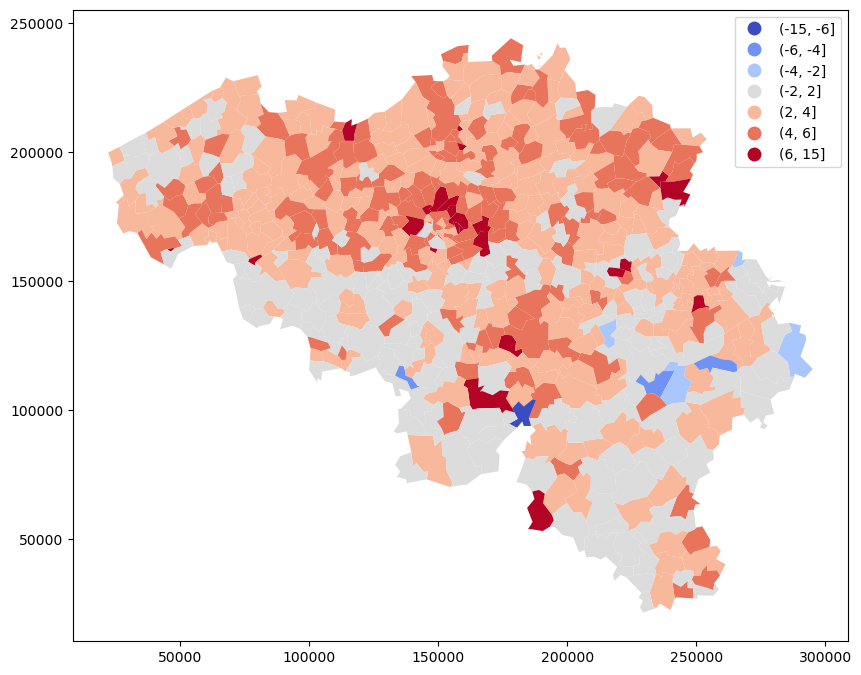

In [39]:
joined.plot(column="NUM_VAT_CHANGE_CAT", figsize=(10, 10), cmap="coolwarm", legend=True)#k=7, scheme="equal_interval")

## Combining columns  - ``pd.concat`` with ``axis=1``

We can use `pd.merge` to combine the columns of two DataFrame based on a common column. If our two DataFrames already have equivalent rows, we can also achieve this basic case using `pd.concat` with specifying `axis=1` (or `axis="columns"`).

![](../img/pandas/schema-concat1.svg)

Assume we have another DataFrame for the same countries, but with some additional statistics:

In [40]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


In [41]:
data = {'country': ['Belgium', 'France', 'Netherlands'],
        'GDP': [496477, 2650823, 820726],
        'area': [8.0, 9.9, 5.7]}
country_economics = pd.DataFrame(data).set_index('country')
country_economics

,GDP,area
country,,
Belgium,496477,8.0
France,2650823,9.9
Netherlands,820726,5.7


In [42]:
pd.concat([countries, country_economics], axis=1)

,country,population,area,capital,GDP,area
0,Belgium,11.3,30510.0,Brussels,NaN,NaN
1,France,64.3,671308.0,Paris,NaN,NaN
2,Germany,81.3,357050.0,Berlin,NaN,NaN
3,Netherlands,16.9,41526.0,Amsterdam,NaN,NaN
4,United Kingdom,64.9,244820.0,London,NaN,NaN
Belgium,NaN,NaN,NaN,NaN,496477.0,8.0
France,NaN,NaN,NaN,NaN,2650823.0,9.9
Netherlands,NaN,NaN,NaN,NaN,820726.0,5.7


`pd.concat` matches the different objects based on the index:

In [43]:
countries2 = countries.set_index('country')

In [44]:
countries2

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


In [45]:
pd.concat([countries2, country_economics], axis="columns")

,population,area,capital,GDP,area
country,,,,,
Belgium,11.3,30510,Brussels,496477.0,8.0
France,64.3,671308,Paris,2650823.0,9.9
Germany,81.3,357050,Berlin,NaN,NaN
Netherlands,16.9,41526,Amsterdam,820726.0,5.7
United Kingdom,64.9,244820,London,NaN,NaN
